# Employee Retention Prediction

#### Loading data and understanding it

In [1]:
# Importing Packages for Exploratory Data Analaysis
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
# Open and read csv dataset file
df = pd.read_csv("employee_dataset.csv")
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [3]:
# Gathering basic regarding data (number of rows, number of columns, and column names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Checking descriptive data for more insight
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [5]:
# Checking column names and renaming them to eliminate typos and adhere to the lower cases snake_case format
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
df = df.rename(columns = {'Work_accident' : 'work_accident', 
          'average_montly_hours' : 'average_monthly_hours',
          'time_spend_company' : 'tenure',
          'Department' : 'department'})

df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [7]:
# Checking for missing values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [8]:
# Checking for duplicates
df.duplicated().sum()

3008

In [9]:
# Check some examples of the duplicated rows
df[df.duplicated()].head()

satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_monthly_hours  tenure  work_accident  left  \
396                     139       3              0     1   
866                     128       3              0     1   
1317                    127       3              0     1   
1368                    132       3              0     1   
1461                    142       3              0     1   

      promotion_last_5years  department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368                      0       RandD     low  
1461                      0       sales     low

In [10]:
# Droping duplicates from dataframe and savinf the result to a different datafram in order to keep a copy of the original dataframe if later needed
ndf = df.drop_duplicates(keep = 'first')

ndf.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

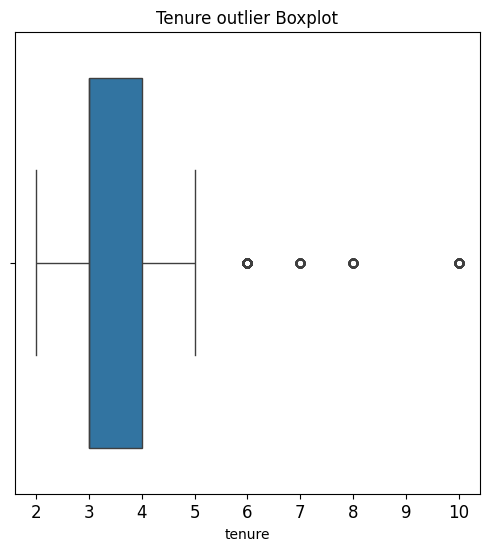

In [11]:
# Determining outliers in order to deal with them

plt.figure(figsize = (6, 6))
plt.title('Tenure outlier Boxplot', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
sns.boxplot(x = ndf['tenure'])
plt.show()

In [12]:
# Determining rows holding an outlier

# Calculate the 25th Quartile
quartile25 = ndf['tenure'].quantile(0.25)

# Calculate the 75th Quartile
quartile75 = ndf['tenure'].quantile(0.75)

# Retreive the interquartile range through the formula iqr = qr75 - qr25
iqr = quartile75 - quartile25

# Set an upper and lower limits for non-outlier values in tenure
upper_limit = quartile75 + 1.5 * iqr
lower_limit = quartile25 - 1.5 * iqr

# View the upper and lower limit
print('Lower limit : ', lower_limit, '\nUpper limit : ', upper_limit)

# Identify rows in the dataframe that hold an outlier
outliers = ndf[(ndf['tenure'] > upper_limit) | (ndf['tenure'] < lower_limit)]

print("Total number of rows holding an outlier : ", len(outliers))

Lower limit :  1.5 
Upper limit :  5.5
Total number of rows holding an outlier :  824


#### Analyzing data through exploratory data

In [13]:
# Retreiving the number of employees who left and those who stayed
print(ndf['left'].value_counts())

print()

# Retreiving the percentage of thos who left and those who stayed
print(ndf['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


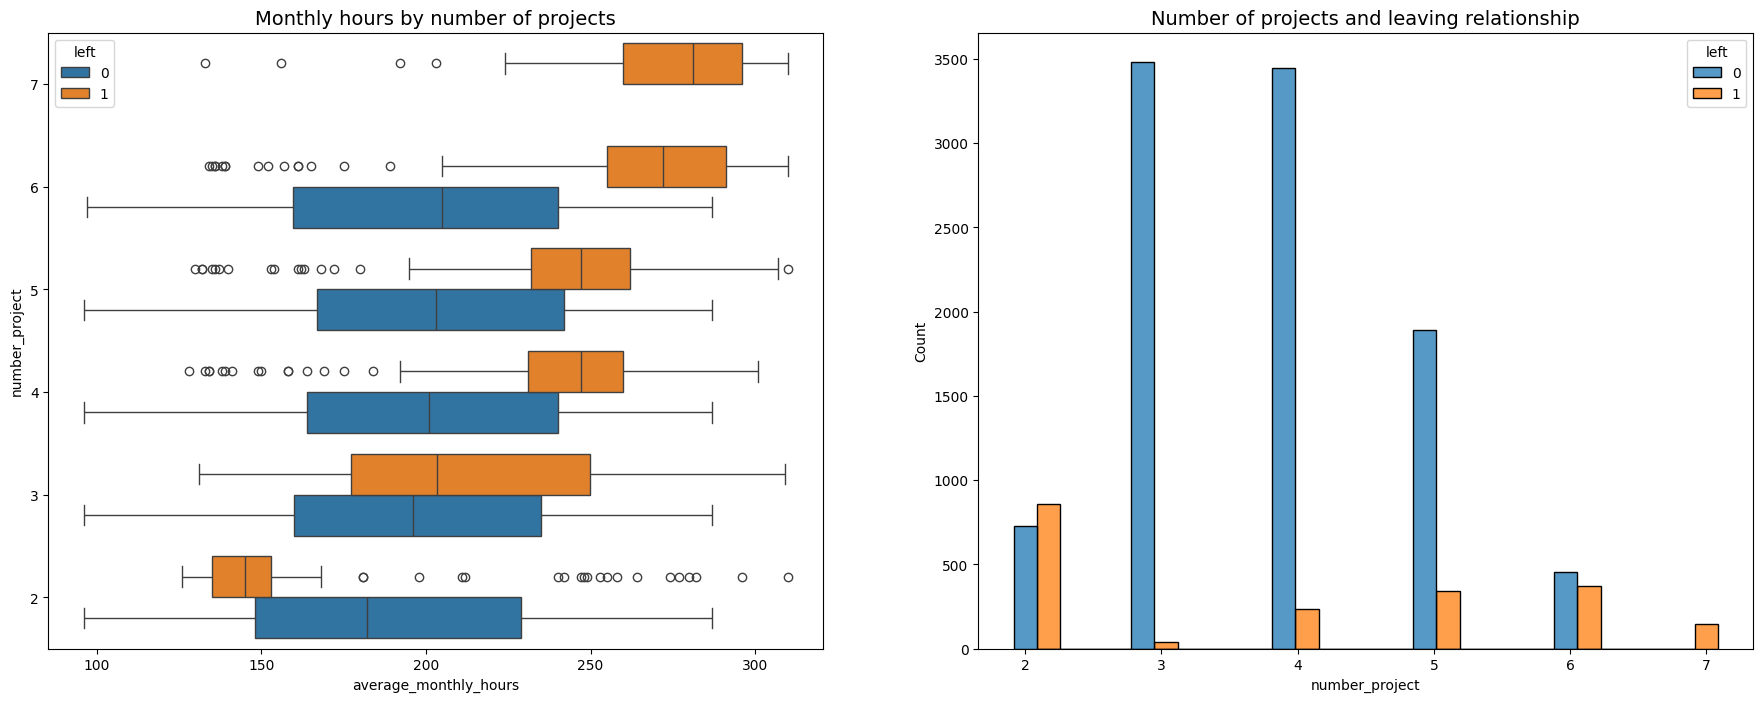

left
1    145
Name: count, dtype: int64

In [14]:
# Visualizing relationships between data variables

# Creating a figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22, 8))

# Creating a boxplot to show the relationship between 'average_monthly_hours' and 'number_project' and comparing employees who left with those who stayed
sns.boxplot(data = ndf, x = 'average_monthly_hours', y = 'number_project', hue = 'left', orient = 'h', ax = ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize = 14)

# Creating a histogram to show the relationship between 'number_project' and employees who left and those who stayed
tenure_stay = ndf[ndf['left'] == 0]['number_project']
tenure_left = ndf[ndf['left'] == 1]['number_project']
sns.histplot(data = ndf, x = 'number_project', hue = 'left', multiple = 'dodge', shrink = 2, ax = ax[1])
ax[1].set_title('Number of projects and leaving relationship', fontsize = 14)

# Display graphs
plt.show();
ndf[ndf['number_project'] == 7]['left'].value_counts()

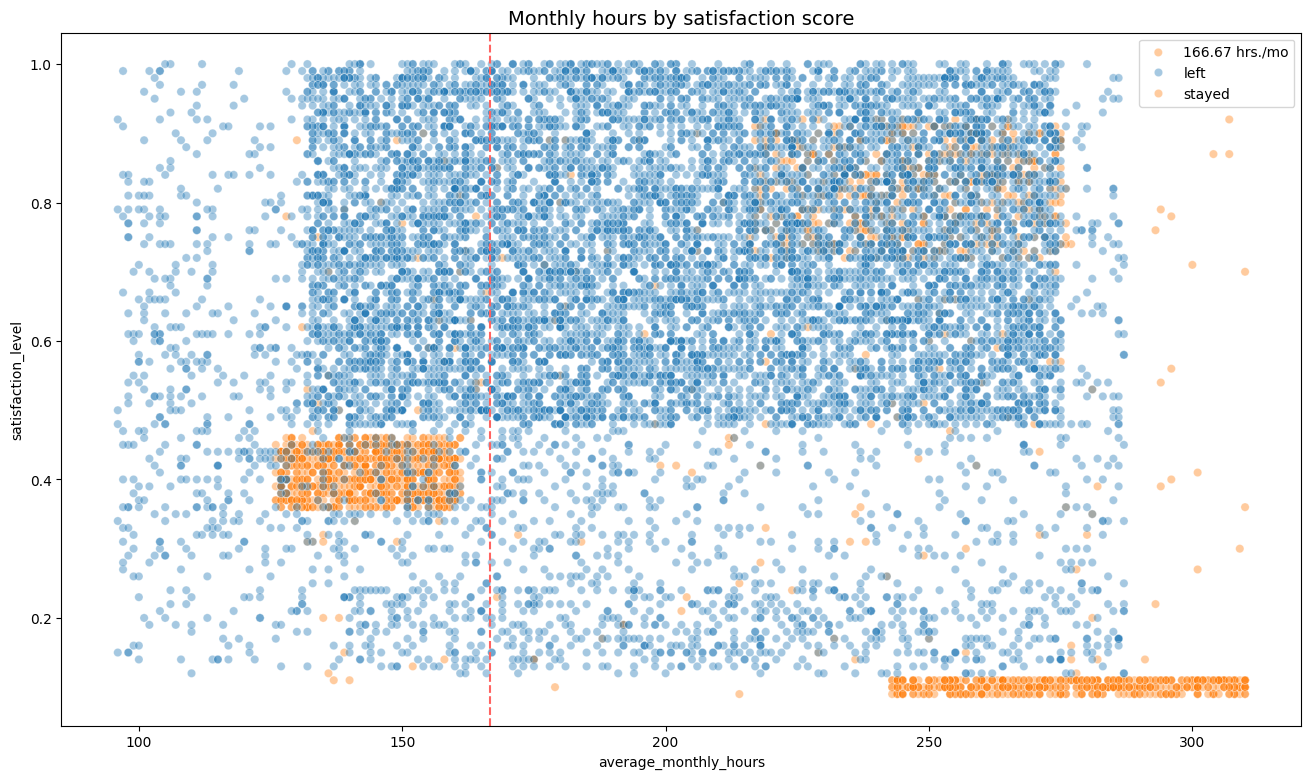

In [15]:
# Creating a scatterplot to view the relationship between 'average_monthly_hours' and 'sastisfaction_level', and employees who left and those who stayed
plt.figure(figsize = (16, 9))
sns.scatterplot(data = ndf, x = 'average_monthly_hours', y = 'satisfaction_level', hue = 'left', alpha = 0.4)
plt.axvline(x = 166.67, color = '#ff6361', label = '166.67 hrs./mo', ls = '--')
plt.legend(labels=['166.67 hrs./mo', 'left', 'stayed'])
plt.title('Monthly hours by satisfaction score', fontsize = 14);

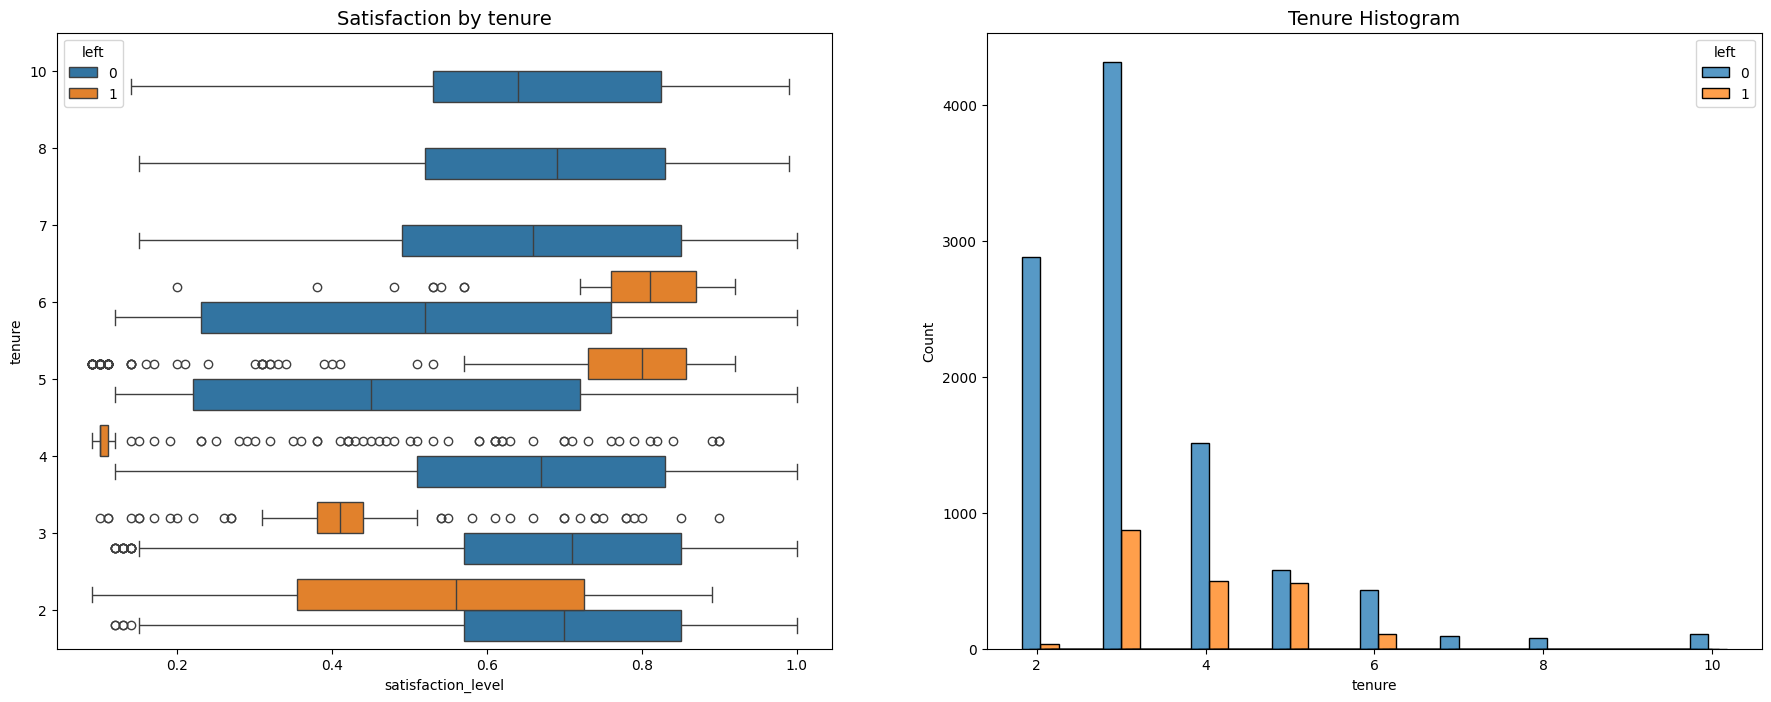

C:\Users\omara\AppData\Local\Temp\ipykernel_14352\2704875551.py:17: FutureWarning: The provided callable <function mean at 0x000002014FA51E40> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  ndf.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])
C:\Users\omara\AppData\Local\Temp\ipykernel_14352\2704875551.py:17: FutureWarning: The provided callable <function median at 0x000002014FB791C0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  ndf.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])


mean  median
left                  
0     0.667365    0.69
1     0.440271    0.41

In [16]:
# Creating a figure of axis to view the relationships betweem 'satisfaction_level' and 'tenure', comparing them between employees who left and others who stayed
fig, ax = plt.subplots(1, 2, figsize = (22, 8))

# Creating a boxplot to show the relationship between 'satisifaction_level' and tenure
sns.boxplot(data = ndf, x = 'satisfaction_level', y = 'tenure', hue = 'left', orient = 'h', ax = ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize = 14)

# Create a histogram to view the distribution of 'tenure' amon employees who left and others who stayed
tenure_stay1 = ndf[ndf['left'] == 0]['tenure']
tenure_left1 = ndf[ndf['left'] == 1]['tenure']
sns.histplot(data = ndf, x = 'tenure', hue = 'left', multiple = 'dodge', shrink = 5, ax = ax[1])
ax[1].set_title('Tenure Histogram', fontsize = 14)

# Plot the graphs
plt.show();
ndf.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])


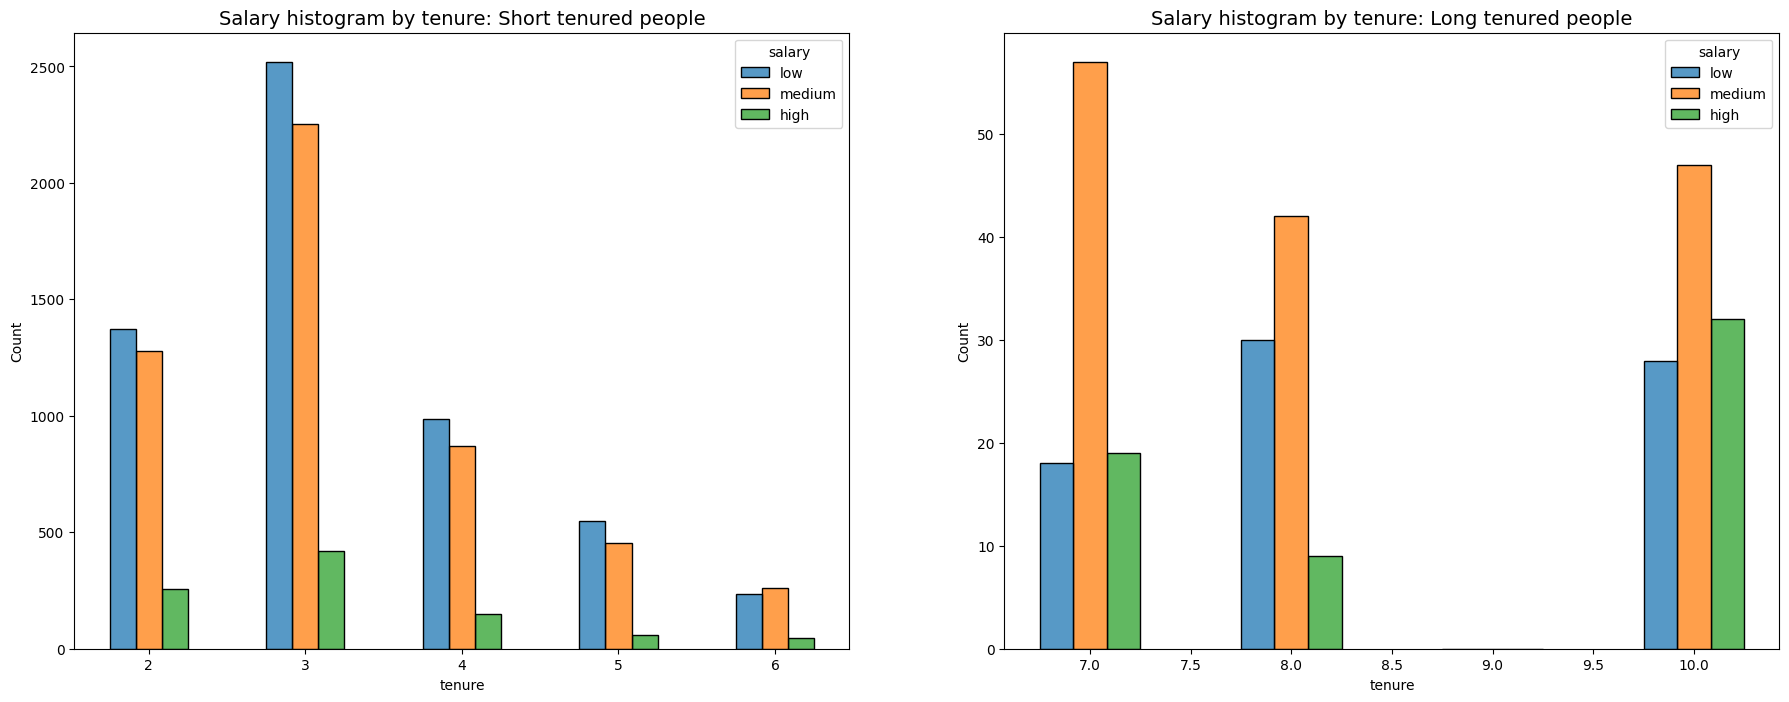

In [17]:
# Creating histograms to compare between employees tenure durations and how salaries were distributed

fig, ax = plt.subplots(1, 2, figsize = (22, 8))

# Employees with a short tenure
short_tenure = ndf[ndf['tenure'] <= 6]

# Employees with a long tenure
long_tenure = ndf[ndf['tenure'] > 6]

# Plot short tenured employees histogram
sns.histplot(data = short_tenure, x = 'tenure', hue = 'salary', discrete = 1, hue_order = ['low', 'medium', 'high'], multiple = 'dodge', shrink = .5, ax =ax[0])
ax[0].set_title('Salary histogram by tenure: Short tenured people', fontsize = '14')

# Plot high tenured employees histogram
sns.histplot(data = long_tenure, x = 'tenure', hue = 'salary', discrete = 1, hue_order = ['low', 'medium', 'high'], multiple = 'dodge', shrink = .5, ax = ax[1])
ax[1].set_title('Salary histogram by tenure: Long tenured people', fontsize = 14);

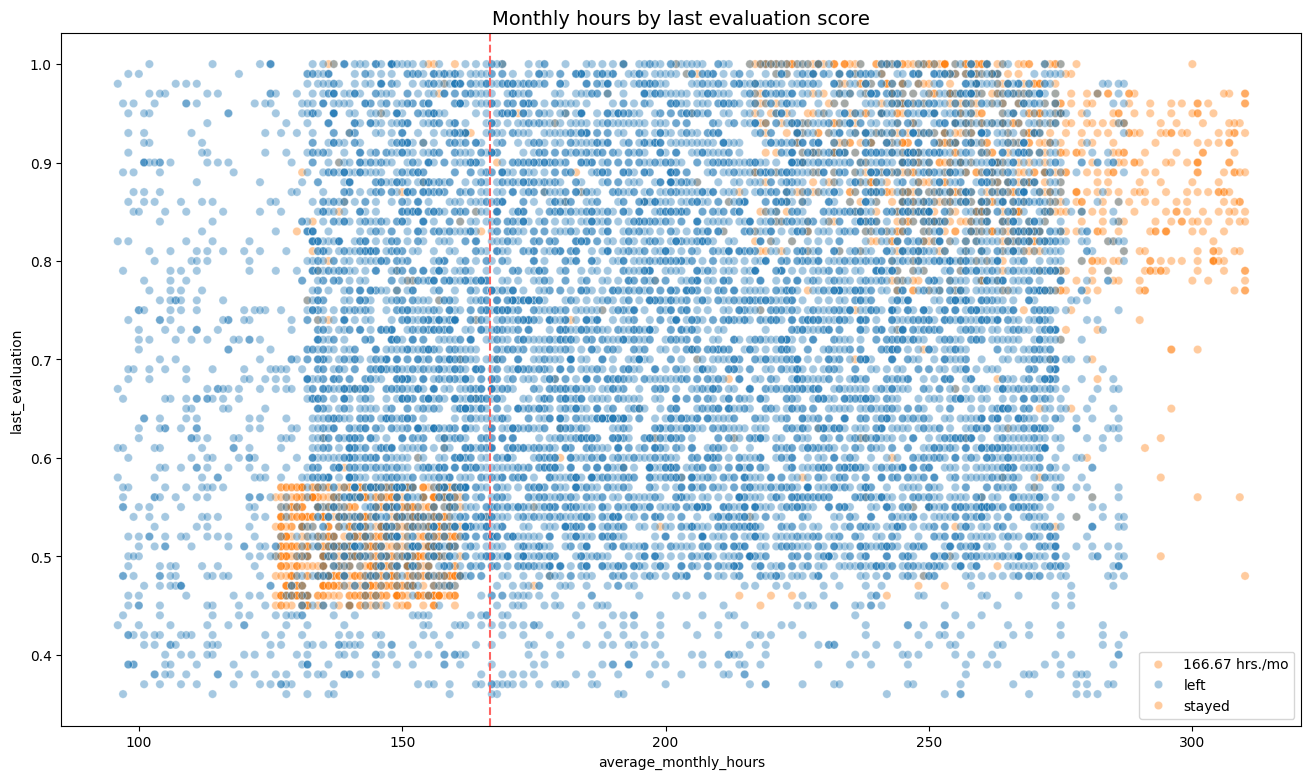

In [18]:
# Creating a scatterplot to view the relationship between 'average_monthly_hours' and 'last_evaluation', and employees who left and those who stayed
plt.figure(figsize = (16, 9))
sns.scatterplot(data = ndf, x = 'average_monthly_hours', y = 'last_evaluation', hue = 'left', alpha = 0.4)
plt.axvline(x = 166.67, color = '#ff6361', label = '166.67 hrs./mo', ls = '--')
plt.legend(labels=['166.67 hrs./mo', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize = 14);

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

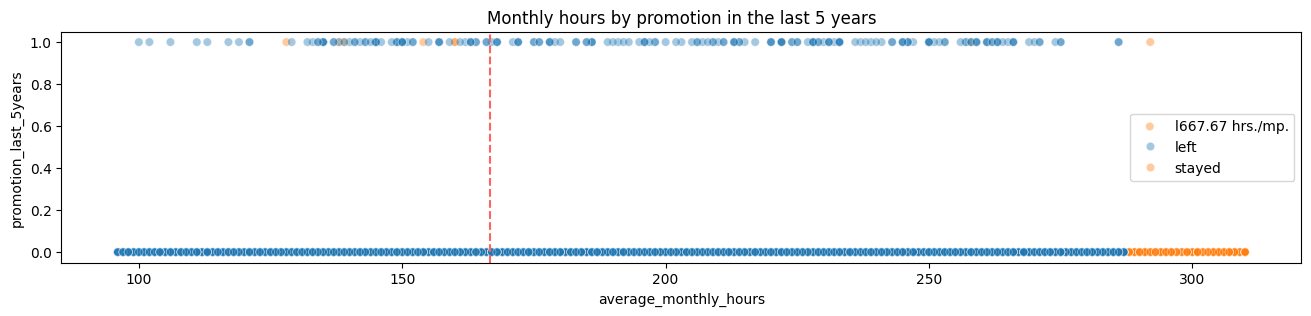

In [19]:
# Creating a scatterplot to determin the relationship between 'average_monthly_hours' and 'promotion_last_5_years'
plt.figure(figsize = (16, 3))
sns.scatterplot(data = ndf, x = 'average_monthly_hours', y = 'promotion_last_5years', hue = 'left', alpha = 0.4)
plt.axvline(x = 166.67, color = '#ff6361', ls ='--')
plt.legend(labels = ['l667.67 hrs./mp.', 'left', 'stayed'])
plt.title('Monthly hours by promotion in the last 5 years')
ndf['department'].value_counts()

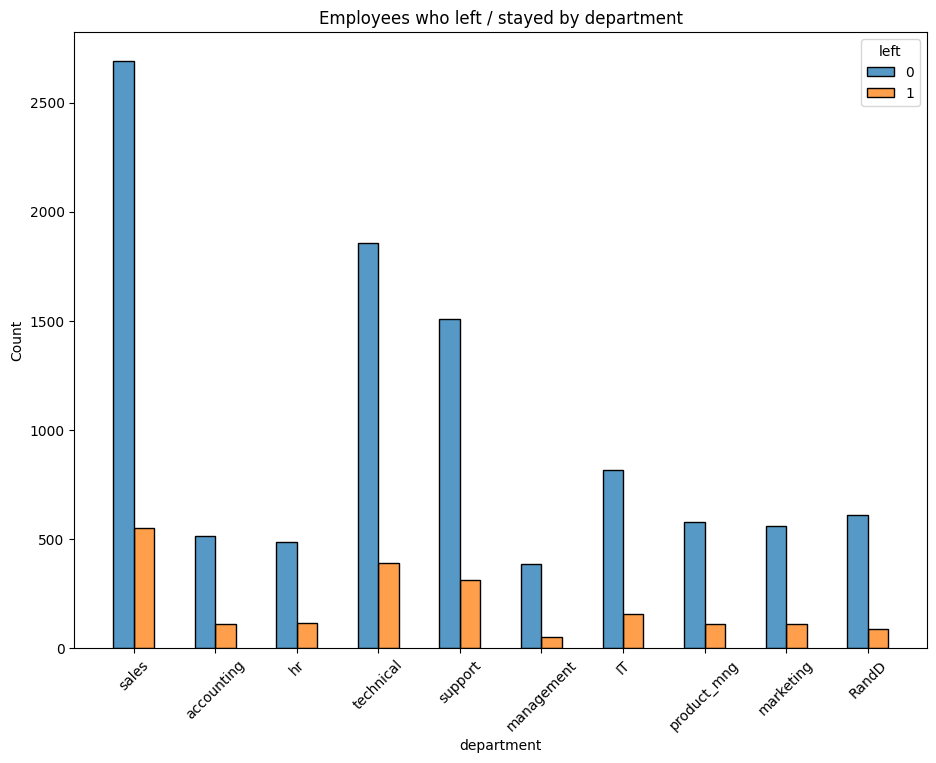

In [20]:
# Crearing a count plot to view the count of employees who left and other who stayed in each department
plt.figure(figsize = (11, 8))
sns.histplot(data = ndf, x = 'department', hue = 'left', discrete = 1, hue_order = [0, 1], multiple = 'dodge', shrink= .5)
plt.xticks(rotation = 45)
plt.title('Employees who left / stayed by department');

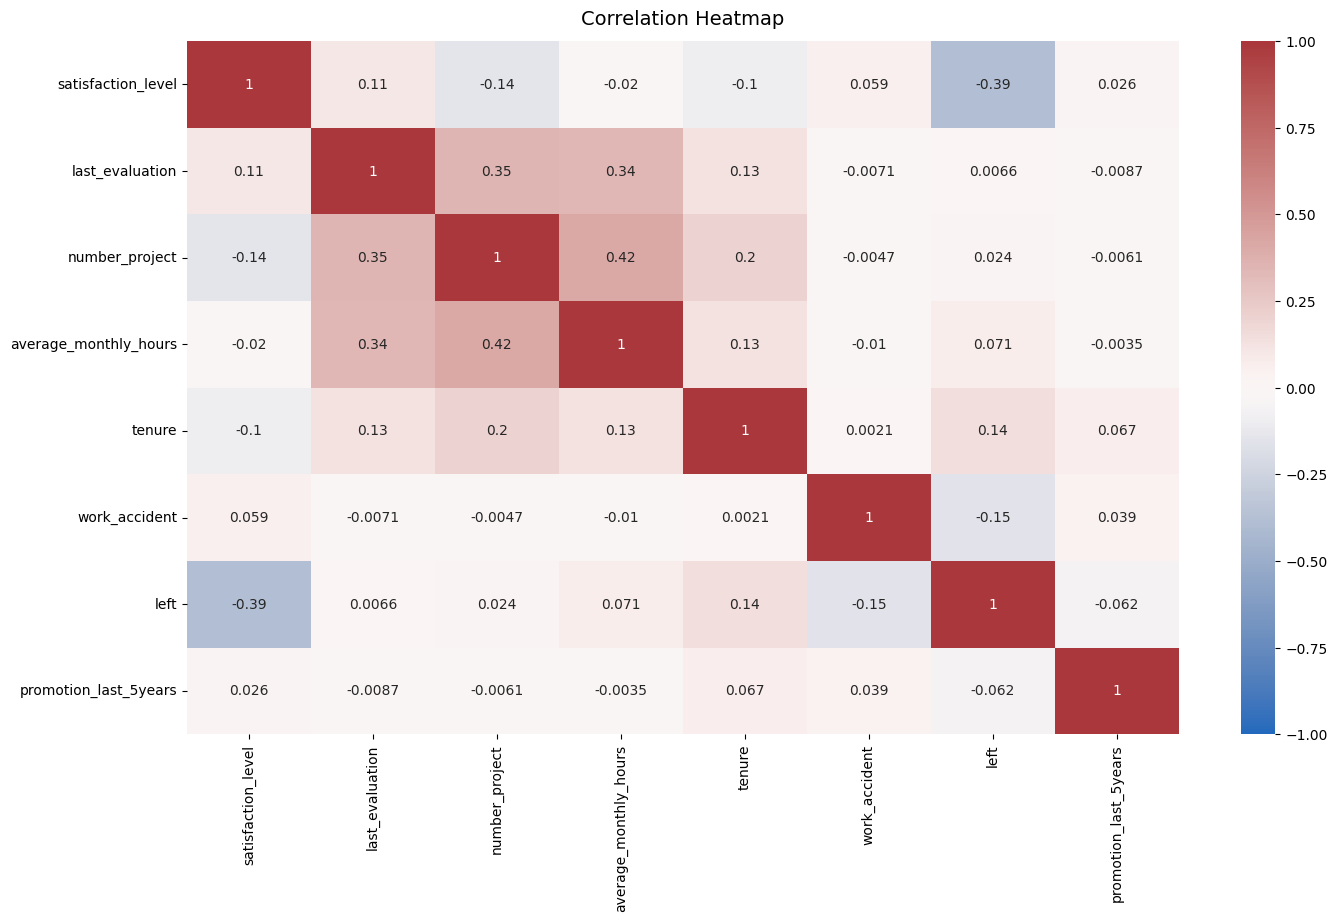

In [21]:
# Creating a plot to view the correlation between the different factors

# Creating a new datafram with only numeric data for calculating the correlation
numericdf = df.select_dtypes(include = ['number'])
hm = numericdf.corr()

# Plot the heat map
plt.figure(figsize = (16, 9))
heatmap = sns.heatmap(hm, vmin = -1, vmax = 1, annot = True, cmap = sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize' : 14}, pad = 12);

### Building the model
#### Encoding the data and creating training data

In [22]:
# Encoding non- numeric columns such as salary and department
encdf = ndf.copy()

# Transforming salary into categories 0 = low, 1 = medium, and 2 = high
encdf['salary'] = (encdf['salary'].astype('category').cat
                   .set_categories(['low', 'medium', 'high']).cat.codes
)

# Using a dummy to one-hot encode 'department'
encdf = pd.get_dummies(encdf, drop_first = False)

encdf.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0          False   
1       6              0     1                      0       1          False   
2       4              0     1                      0       1          False   
3       5              0     1                      0       0          False   
4       3              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

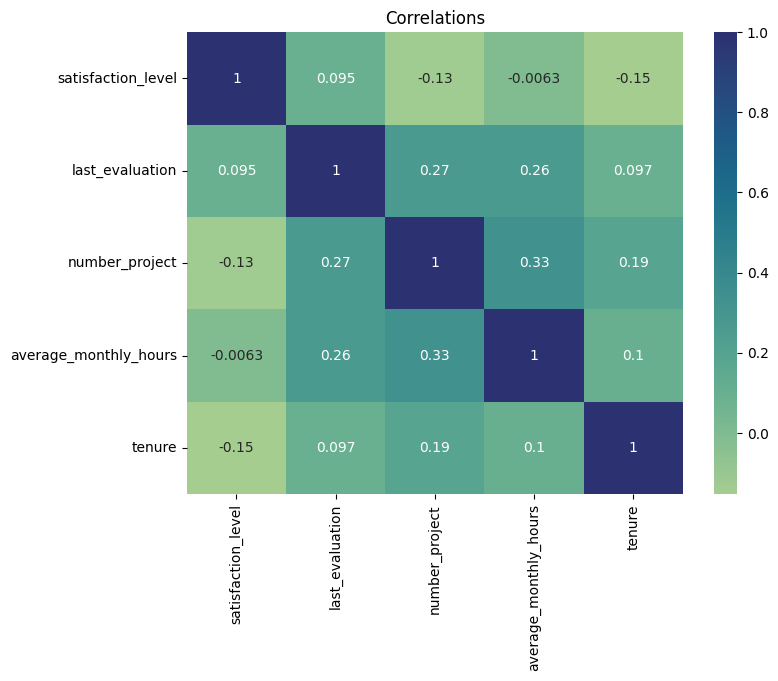

In [23]:
# Plotting the correlation between satisfaction_level	last_evaluation	number_project	average_monthly_hours	tenure
plt.figure(figsize = (8, 6))
sns.heatmap(encdf[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']].corr(), annot = True, cmap = 'crest')
plt.title('Correlations')
plt.show()

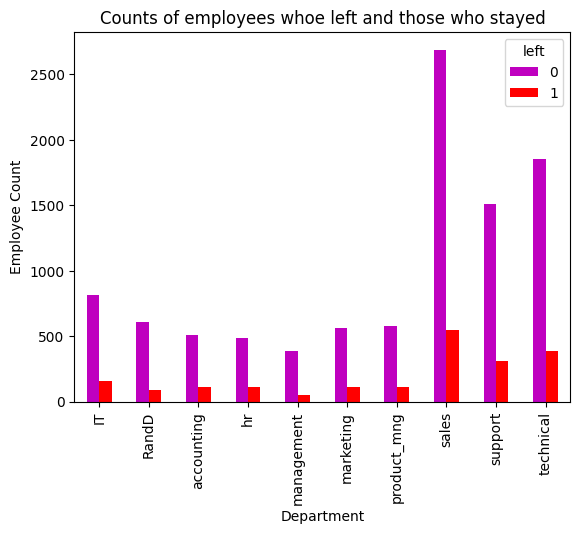

In [24]:
# Visualizing employees by department
pd.crosstab(ndf['department'], ndf['left']).plot(kind = 'bar', color = 'mr')
plt.title('Counts of employees whoe left and those who stayed')
plt.ylabel('Employee Count')
plt.xlabel('Department')
plt.show()

In [25]:
# Creating a new dataframe without outliers from the 'tenure' colum in order to pass it to the model classifier
oldf = encdf[(encdf['tenure'] >= lower_limit) & (encdf['tenure'] <= upper_limit)]

oldf.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0          False   
2       4              0     1                      0       1          False   
3       5              0     1                      0       0          False   
4       3              0     1                      0       0          False   
5       3              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   
5             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   
5                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False  
5              True               False                 False

In [26]:
# Split the 'left' column from the rest of the columns as it holds the labels y
y = oldf['left']

y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [27]:
# Assigning training feature for the training data X
X = oldf.drop('left', axis = 1)

X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0          False   
2       4              0                      0       1          False   
3       5              0                      0       0          False   
4       3              0                      0       0          False   
5       3              0                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   
5             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   
5                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False  
5              True               False                 False

#### Creating and training a Logistic Regression Model

In [28]:
# Importing Dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

In [29]:
# Splitting training, and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

In [30]:
# Creating logistic regression classifier model and fitting in the data
logCLF = LogisticRegression(random_state = 42, max_iter = 500).fit(X_train, y_train)

In [31]:
# Predict the data through the trained logistic regression model
y_pred = logCLF.predict(X_test)

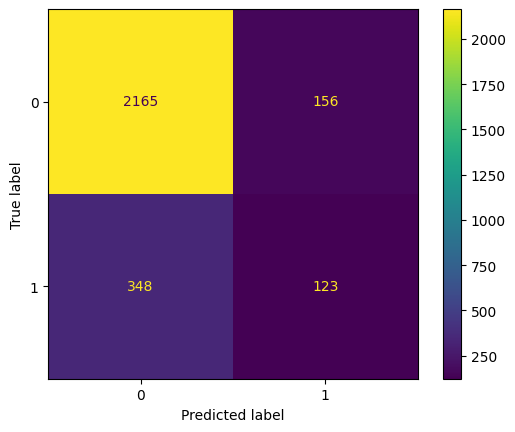

In [32]:
# Creating a confusion matrix to plot the reults of the logistic classifier
logCM = confusion_matrix(y_test, y_pred, labels = logCLF.classes_)

# Creating a matrix display and passing the creating matrix into the display
logDisp = ConfusionMatrixDisplay(confusion_matrix = logCM, display_labels = logCLF.classes_)

# Plotting the matrix Display
logDisp.plot(values_format = '')
plt.show()

In [33]:
# Checking the values for the 'left' feature compared to the logistic classifier's predictions
oldf['left'].value_counts(normalize = True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

In [34]:
# Creating a classificaiton report for the logistic classifier
target_names= ['Predicted to stay', 'Predicted to leave']
print(classification_report(y_test, y_pred, target_names = target_names))

                    precision    recall  f1-score   support

 Predicted to stay       0.86      0.93      0.90      2321
Predicted to leave       0.44      0.26      0.33       471

          accuracy                           0.82      2792
         macro avg       0.65      0.60      0.61      2792
      weighted avg       0.79      0.82      0.80      2792



#### Creating and training a Decision Tree Classifier

In [35]:
# Assigning the labels' colum 'left' to y
y = encdf['left']

y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [36]:
# Creating the features X without the labels 'left'
X = encdf.drop('left', axis = 1)

X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0          False   
1       6              0                      0       1          False   
2       4              0                      0       1          False   
3       5              0                      0       0          False   
4       3              0                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

In [37]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

In [38]:
# Create decision tree classifier
tree = DecisionTreeClassifier(random_state = 0)

# Creating a dictionary of hyperparameter values to pass for GridSearch and choose the best
cv_params = {'max_depth': [4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]}

# Assigning a dictionary with scoring metric for evaluation
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Create Gridsearch and search for ideal parameters using the defined dictionaries
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv = 4, refit = 'roc_auc')

In [39]:
%%time
tree1.fit(X_train, y_train)

CPU times: total: 1.36 s
Wall time: 2.9 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [40]:
# Checking best paramaters out of all parameters passed to the grid search
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [41]:
# Checking best accuracy score out of the resulting scores
tree1.best_score_

0.9758877392438816

In [42]:
def make_results(model_name, model_object, metric):

    '''

    model_name : name of the model to be created
    model_object : GridSearch Object
    metric : precision, recall, f1, accuracy or auc

    Return a dataframe with the values of precision, recall, f1, accuaracy and auc scores for the model that score
    the best mean 'mean' metric across cross validation folds

    '''
    # Mapping passed metric to the GridSeach
    metric_dict = {'auc' : 'mean_test_roc_auc',
                   'precision' : 'mean_test_precision',
                   'recall' : 'mean_test_recall',
                   'f1' : 'mean_test_f1',
                   'accuracy' : 'mean_test_accuracy'
                    }
    
    # Creating a df to hold the data for all results from across different cross validation folds
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Get the metric with the max score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Retreive the values of precision, recall, f1, accuracy, and auc from the metric with the best results
    auc = best_estimator_results.mean_test_roc_auc
    precision = best_estimator_results.mean_test_precision
    recall = best_estimator_results.mean_test_recall
    f1 = best_estimator_results.mean_test_f1
    accuracy = best_estimator_results.mean_test_accuracy

    # Creating a table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]})
    

    return table

In [43]:
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.966878  0.918288  0.941941  0.981208  0.975888

#### Creating a Random Forest Classifier

In [44]:
# Creating a random forest classifier object
rf = RandomForestClassifier(random_state = 0)

# Setting a dictionary with varied hyperparameters
cv_params = {'max_depth' : [3, 5, None],
             'max_features' : [1.0], 
             'max_samples' : [0.7, 1.0],
             'min_samples_leaf' : [1, 2, 3],
             'min_samples_split' : [2, 3, 4],
             'n_estimators' : [300, 500]}

# Setting a dictionary with the desired scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Using GridSearch to search ove the hyperparameters dictionary
rf1 = GridSearchCV(rf, cv_params, scoring = scoring, cv = 4, refit = 'roc_auc')

In [45]:
%%time
rf1.fit(X_train, y_train)

CPU times: total: 12min 35s
Wall time: 25min 22s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [46]:
# Checking the best parameters
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [47]:
# Checking the best score
rf1.best_score_

0.9822377413943887

In [86]:
# Setting the path where the pickel model would be saved
path  = 'D:\\Academic & Coding\\Projects\\Employee Retention\\'

In [88]:
# Importing pcikle in order to save the model into a pickle file
import pickle

In [89]:
# Saving the model into a pickle file for later use

def create_pickle(path, model_object, fileName):

    '''
    path : path of the file where the pickle file will be saved
    model_object : model to be saved
    fileName : name of the pickle file to be saved
    
    Creates a pickle file that saves the model_object and hold the name of fileName
    '''
    
    with open(path + fileName + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [90]:
# Function to read pickle file

def read_pickle(path, lmodel):

    '''
    path : path of the folder that contains the pickle file
    lmodel : name of the pickle file

    returns the model saved in the pickle file
    '''

    with open(path + lmodel + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)
    
    return model

In [53]:
# Save the random forest classifier into the pickle file
create_pickle(path, rf1, 'RandomForestClassifier')

In [54]:
# Loading the saved random forest classifier
rf1 = read_pickle(path, 'RandomForestClassifier')

In [55]:
# Checking the auc score
rf1.best_score_

0.9822377413943887

In [56]:
# Checking best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [57]:
# Getting the results of the random forest classifier and comparing them with the decision tree classifies
rf1_cv_results = make_results('RandomForestClassifier', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)


              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.966878  0.918288  0.941941  0.981208  0.975888
                    model  precision    recall       F1  accuracy       auc
0  RandomForestClassifier   0.946269  0.919628  0.93273  0.977983  0.982238


In [58]:
def get_socres(modelName, model, X_test, y_test):

    '''
    modelName : Name of the model
    model : GridSearch model object
    X_test : numpy array of X_test data
    y_test : numpy array of y_test data

    Dataframe with scoring metircs of the passed model
    '''

    preds = model.best_estimator_.predict(X_test)

    auc = roc_auc_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    accuracy = accuracy_score(y_test, preds)

    table = pd.DataFrame({'model' : [modelName],
                          'precision' : [precision],
                          'recall' : [recall],
                          'f1' : [f1],
                          'AUC' : [auc],
                          'accuracy' : [accuracy]})
    
    return table

In [59]:
# Performing predicitons on the test data
rf1_ts = get_socres('RandomForestClassifier', rf1, X_test, y_test)
rf1_ts

model  precision    recall        f1       AUC  accuracy
0  RandomForestClassifier   0.954262  0.921687  0.937692  0.956443  0.979653

#### Engineering a new feature 'Overworked' and experimenting its results

Experimenting with a decision tree

In [ ]:
# Dropping irrelevant column 'satisfaction_level'
fedf = encdf.drop('satisfaction_level', axis = 1)

fedf.head()

last_evaluation  number_project  average_monthly_hours  tenure  \
0             0.53               2                    157       3   
1             0.86               5                    262       6   
2             0.88               7                    272       4   
3             0.87               5                    223       5   
4             0.52               2                    159       3   

   work_accident  left  promotion_last_5years  salary  department_IT  \
0              0     1                      0       0          False   
1              0     1                      0       1          False   
2              0     1                      0       1          False   
3              0     1                      0       0          False   
4              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

In [61]:
# Create new column 'overworked' and copy values of 'average_monthly_hours' to later create a threshold for overworking range
fedf['overworked'] = fedf['average_monthly_hours']

# Checking the maximum and minimum number of hours spend monthly
print('Max hours: ', fedf['overworked'].max())
print('Min hours: ', fedf['overworked'].min())

Max hours:  310
Min hours:  96


In [ ]:
# Setting the threshold for 'overworked' to be above 175
fedf['overworked'] = (fedf['overworked'] > 175).astype(int)

fedf['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int32

In [63]:
# Dropping the 'average_monthly_hours' since it has been translated into the 'overworked' column
fedf = fedf.drop('average_monthly_hours', axis = 1)

fedf.head()

last_evaluation  number_project  tenure  work_accident  left  \
0             0.53               2       3              0     1   
1             0.86               5       6              0     1   
2             0.88               7       4              0     1   
3             0.87               5       5              0     1   
4             0.52               2       3              0     1   

   promotion_last_5years  salary  department_IT  department_RandD  \
0                      0       0          False             False   
1                      0       1          False             False   
2                      0       1          False             False   
3                      0       0          False             False   
4                      0       0          False             False   

   department_accounting  department_hr  department_management  \
0                  False          False                  False   
1                  False          False                  False   
2                  False          False                  False   
3                  False          False                  False   
4                  False          False                  False   

   department_marketing  department_product_mng  department_sales  \
0                 False                   False              True   
1                 False                   False              True   
2                 False                   False              True   
3                 False                   False              True   
4                 False                   False              True   

   department_support  department_technical  overworked  
0               False                 False           0  
1               False                 False           1  
2               False                 False           1  
3               False                 False           1  
4               False                 False           0

In [64]:
# Set the 'left' colum as y(predicitons)
y = fedf['left']

# Drop the predictions column 'left' from X (features)
X = fedf.drop('left', axis = 1)

In [65]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 0)

In [ ]:
# Create an object for the decision tree classifier
tree = DecisionTreeClassifier(random_state = 0)

# Setting the parameters into a dictionary to seach over them using GridSearchCV for the best params
cv_params = {'max_depth' : [4, 6, 8, None],
             'min_samples_leaf' : [2, 5, 1],
             'min_samples_split' : [2, 4, 6]}

# Setting the required scoring mechanisms
scoring = ['precision', 'recall', 'f1', 'accuracy', 'roc_auc']

# Creating a GridSearch to search ive the Decision Tree Classifier
fet = GridSearchCV(tree, cv_params, scoring = scoring, cv = 4, refit = 'roc_auc')

In [ ]:
# Training the model using the GridSearch
%%time
fet.fit(X_train, y_train)

CPU times: total: 891 ms
Wall time: 2.8 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['precision', 'recall', 'f1', 'accuracy', 'roc_auc'])

In [70]:
fet.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [71]:
fet.best_score_

0.9586752505340426

In [78]:
fet_cv_results = make_results('DecisionTree with EF', fet, 'auc')
print(tree1_cv_results)
print(fet_cv_results)


              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.966878  0.918288  0.941941  0.981208  0.975888
                  model  precision    recall        F1  accuracy       auc
0  DecisionTree with EF   0.856693  0.903553  0.878882  0.958523  0.958675


Experimenting with Random Forest

In [83]:
# Creating a random forest object
rf = RandomForestClassifier(random_state = 0)

# Assigning parameters to search over using GridSearch
cv_params = {'max_depth' : [3, 5, None],
             'max_features' : [1.0],
             'max_samples' : [0.7, 1.0],
             'min_samples_leaf' : [1, 2, 3],
             'min_samples_split' : [2, 3, 4],
             'n_estimators' : [300, 500]}

# Creating a list with scoring metrics desired
scoring = ['precision', 'recall', 'f1', 'accuracy', 'roc_auc']

# Create a Grid Search to search over the parameters dictionary and choose the best parameters
ferf = GridSearchCV(rf, cv_params, scoring = scoring, cv = 4, refit = 'roc_auc')

In [84]:
%%time
ferf.fit(X_train, y_train)

CPU times: total: 8min 24s
Wall time: 1h 1min 49s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['precision', 'recall', 'f1', 'accuracy', 'roc_auc'])

In [91]:
# Save the Grid Search with the random forest classifier into a pickle file
create_pickle(path, ferf, 'RandomForestClassifier2')

In [ ]:
# Loading the random forest classifier
fref = read_pickle(path, 'RandomForestClassifier2')

In [ ]:
# Checking the parameters
fref.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [ ]:
# Checking the bes 'auc' score
fref.best_score_

0.9648100662833985

In [97]:
# Getting the results of precision, recall, f1, accuracy, and auc
fref_cv_results = make_results('RandomForestClassifier2', fref, 'auc')
fref_cv_results

model  precision    recall        F1  accuracy      auc
0  RandomForestClassifier2   0.866758  0.878754  0.872407  0.957411  0.96481

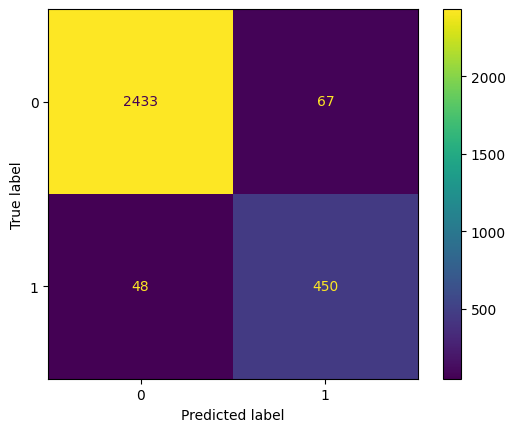

In [100]:
# Getting prediction using the best Random Forest classifier estimator
preds = fref.best_estimator_.predict(X_test)

# Creating the confusion matrix
cm = confusion_matrix(y_test, preds, labels = ferf.classes_)

# Creating confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ferf.classes_)

# Displaying the matrix
disp.plot(values_format = '');

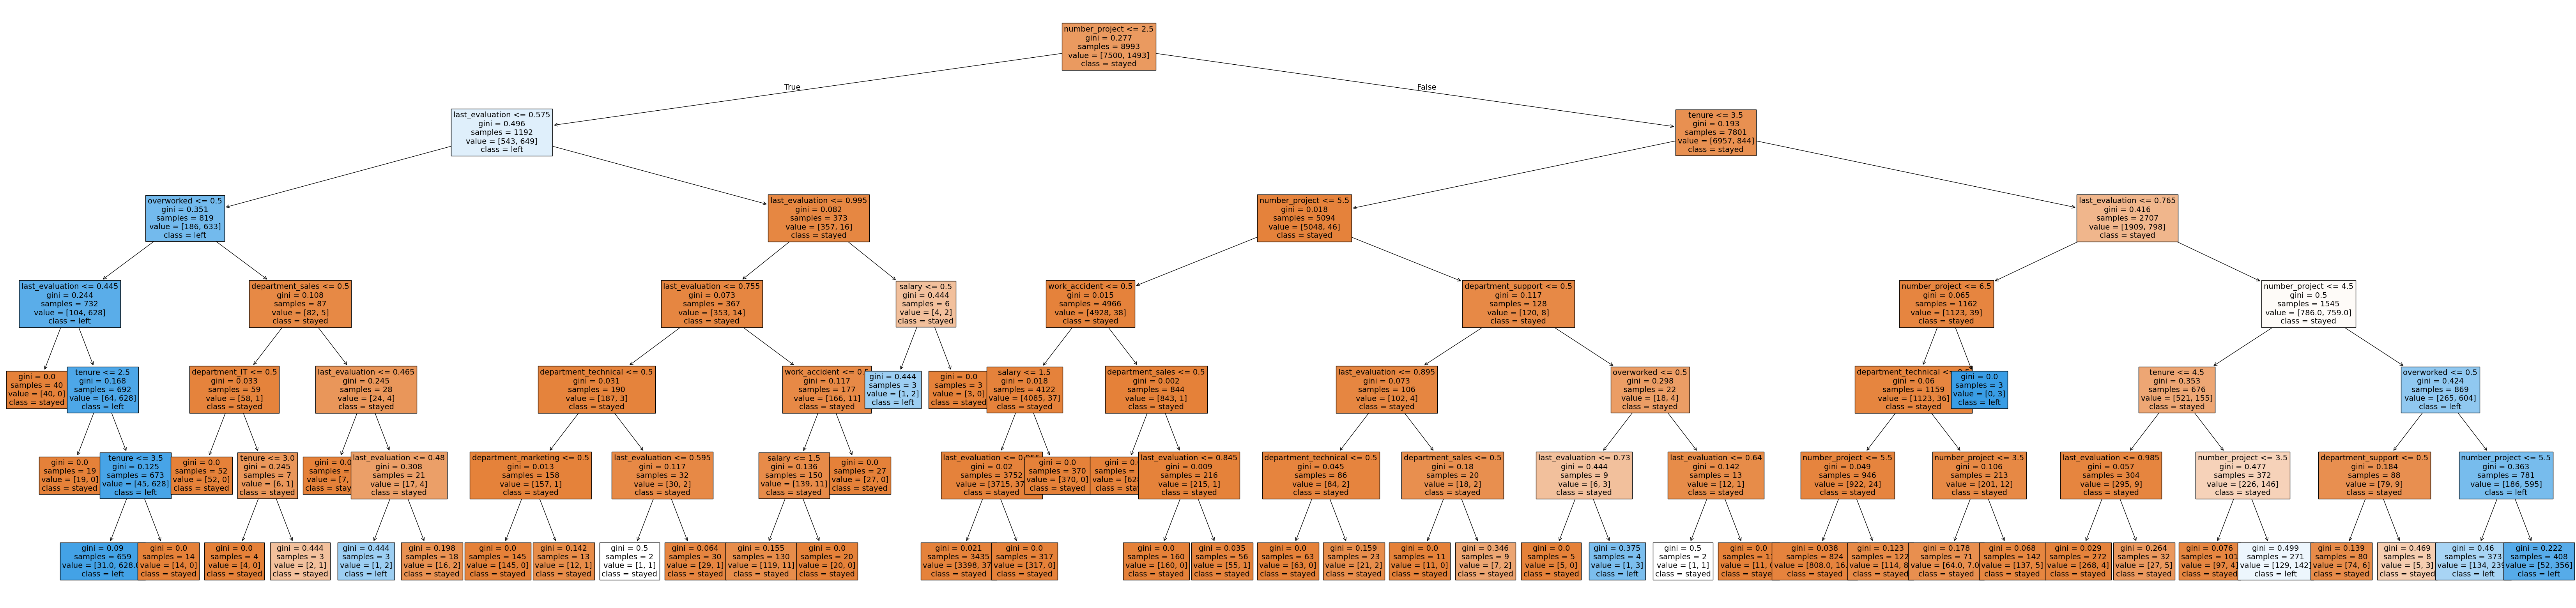

In [ ]:
# Plotting the Decision tree
plt.figure(figsize = (85, 20))
plot_tree(fet.best_estimator_, max_depth = 6, fontsize = 14, feature_names = X.columns, 
          class_names = {0: 'stayed', 1: 'left'}, filled = True);
plt.show()

In [106]:
# Checking the most important colums for classification
fet_importances = pd.DataFrame(fet.best_estimator_.feature_importances_, columns = ['gini_importance'], index = X.columns)

# Sorting importances datafram by the gini importance value
fet_importances = fet_importances.sort_values(by = 'gini_importance', ascending = False)

# Get features with a value > 0
fet_importances = fet_importances[fet_importances['gini_importance'] > 0]
fet_importances

gini_importance
last_evaluation              0.343958
number_project               0.343385
tenure                       0.215681
overworked                   0.093498
department_support           0.001142
salary                       0.000910
department_sales             0.000607
department_technical         0.000418
work_accident                0.000183
department_IT                0.000139
department_marketing         0.000078

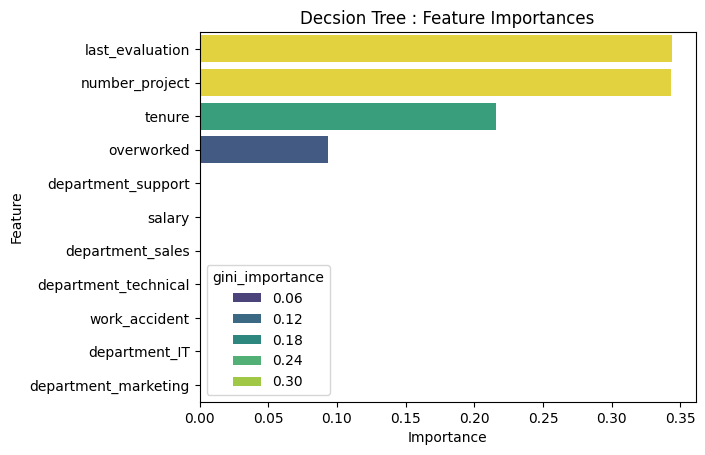

In [130]:
# Plotting the sorted importance
sns.barplot(data = fet_importances, x = 'gini_importance', y = fet_importances.index, orient = 'h', hue = 'gini_importance', palette = 'viridis')
plt.title('Decsion Tree : Feature Importances', fontsize = 12)
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.show()